In [2]:
%matplotlib inline

In [3]:
from keras.datasets import imdb
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
word_index=imdb.get_word_index()

In [5]:
reversed_word_index=dict(
    [value,key] for (key,value) in word_index.items()
)

In [6]:
decoded_review=" ".join(
    reversed_word_index.get(i-3,'?') for i in train_data[0]#.get()如果键值不存在返回‘？’
)

In [7]:
import numpy as cp

def vectorize_sequences(seqs, dimension=10000):
    result = cp.zeros((len(seqs), dimension))
    for i, seq in enumerate(seqs):  #enumerate 映射为（顺序，内容）
        result[i, seq] = 1
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
y_train = cp.array(train_label).astype('float32')
y_test = cp.array(test_label).astype('float32')


In [9]:
from keras import models, layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
from keras import optimizers
from keras import losses
model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [11]:
import numpy as np
x_val = np.array(x_train[:1000])
y_val = np.array(y_train[:1000])
partial_x_train = np.array(x_train[1000:])
partial_y_train = np.array(y_train[1000:])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.


Train on 24000 samples, validate on 1000 samples
Epoch 1/20


  512/24000 [..............................] - ETA: 1:16 - loss: 0.7003 - acc: 0.4902

 1536/24000 [>.............................] - ETA: 25s - loss: 0.6898 - acc: 0.5169 

 2560/24000 [==>...........................] - ETA: 15s - loss: 0.6785 - acc: 0.5270

 3584/24000 [===>..........................] - ETA: 10s - loss: 0.6681 - acc: 0.5329

 4608/24000 [====>.........................] - ETA: 8s - loss: 0.6618 - acc: 0.5623 

 5632/24000 [======>.......................] - ETA: 6s - loss: 0.6515 - acc: 0.5843

 6656/24000 [=======>......................] - ETA: 5s - loss: 0.6426 - acc: 0.6064

 7680/24000 [========>.....................] - ETA: 4s - loss: 0.6362 - acc: 0.6221

 8704/24000 [=========>....................] - ETA: 3s - loss: 0.6288 - acc: 0.6391

 9728/24000 [===========>..................] - ETA: 3s - loss: 0.6222 - acc: 0.6517

10752/24000 [============>.................] - ETA: 2s - loss: 0.6161 - acc: 0.6671

11776/24000 [=============>................] - ETA: 2s - loss: 0.6101 - acc: 0.6776

12800/24000 [===============>..............] - ETA: 2s - loss: 0.6035 - acc: 0.6891

13824/24000 [================>.............] - ETA: 1s - loss: 0.5967 - acc: 0.6982

14848/24000 [=================>............] - ETA: 1s - loss: 0.5897 - acc: 0.7071

15872/24000 [==================>...........] - ETA: 1s - loss: 0.5816 - acc: 0.7171

16896/24000 [====================>.........] - ETA: 1s - loss: 0.5753 - acc: 0.7250

17920/24000 [=====================>........] - ETA: 0s - loss: 0.5682 - acc: 0.7329

18944/24000 [======================>.......] - ETA: 0s - loss: 0.5617 - acc: 0.7400

19968/24000 [=======================>......] - ETA: 0s - loss: 0.5546 - acc: 0.7469

20992/24000 [=========================>....] - ETA: 0s - loss: 0.5482 - acc: 0.7530

22016/24000 [==========================>...] - ETA: 0s - loss: 0.5425 - acc: 0.7578

23040/24000 [===========================>..] - ETA: 0s - loss: 0.5369 - acc: 0.7620

24000/24000 [==============================] - 3s 141us/step - loss: 0.5318 - acc: 0.7662 - val_loss: 0.3973 - val_acc: 0.8750


Epoch 2/20
  512/24000 [..............................] - ETA: 1s - loss: 0.3745 - acc: 0.9141

 1536/24000 [>.............................] - ETA: 1s - loss: 0.3688 - acc: 0.9056

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.3657 - acc: 0.8984

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.3681 - acc: 0.8903

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.3669 - acc: 0.8913

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.3632 - acc: 0.8933

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.3576 - acc: 0.8942

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.3519 - acc: 0.8966

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.3469 - acc: 0.8981

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.3439 - acc: 0.8988

10752/24000 [============>.................] - ETA: 0s - loss: 0.3399 - acc: 0.8991

11776/24000 [=============>................] - ETA: 0s - loss: 0.3372 - acc: 0.8990

12800/24000 [===============>..............] - ETA: 0s - loss: 0.3328 - acc: 0.9007

13824/24000 [================>.............] - ETA: 0s - loss: 0.3295 - acc: 0.9013

14848/24000 [=================>............] - ETA: 0s - loss: 0.3267 - acc: 0.9017

15872/24000 [==================>...........] - ETA: 0s - loss: 0.3253 - acc: 0.9007

16896/24000 [====================>.........] - ETA: 0s - loss: 0.3219 - acc: 0.9022

17920/24000 [=====================>........] - ETA: 0s - loss: 0.3198 - acc: 0.9023

18944/24000 [======================>.......] - ETA: 0s - loss: 0.3163 - acc: 0.9035

19968/24000 [=======================>......] - ETA: 0s - loss: 0.3142 - acc: 0.9034

20992/24000 [=========================>....] - ETA: 0s - loss: 0.3136 - acc: 0.9020

22016/24000 [==========================>...] - ETA: 0s - loss: 0.3123 - acc: 0.9019

23040/24000 [===========================>..] - ETA: 0s - loss: 0.3104 - acc: 0.9022

24000/24000 [==============================] - 2s 72us/step - loss: 0.3089 - acc: 0.9025 - val_loss: 0.2818 - val_acc: 0.8910


Epoch 3/20
  512/24000 [..............................] - ETA: 1s - loss: 0.2253 - acc: 0.9414

 1536/24000 [>.............................] - ETA: 1s - loss: 0.2176 - acc: 0.9473

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.2242 - acc: 0.9363

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.2246 - acc: 0.9367

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.2255 - acc: 0.9360

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.2232 - acc: 0.9352

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.2285 - acc: 0.9300

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.2292 - acc: 0.9301

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.2292 - acc: 0.9295

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.2281 - acc: 0.9292

10752/24000 [============>.................] - ETA: 0s - loss: 0.2266 - acc: 0.9296

11776/24000 [=============>................] - ETA: 0s - loss: 0.2272 - acc: 0.9282

12800/24000 [===============>..............] - ETA: 0s - loss: 0.2252 - acc: 0.9285

13824/24000 [================>.............] - ETA: 0s - loss: 0.2241 - acc: 0.9276

14848/24000 [=================>............] - ETA: 0s - loss: 0.2229 - acc: 0.9277

15872/24000 [==================>...........] - ETA: 0s - loss: 0.2220 - acc: 0.9281

16896/24000 [====================>.........] - ETA: 0s - loss: 0.2207 - acc: 0.9289

17920/24000 [=====================>........] - ETA: 0s - loss: 0.2196 - acc: 0.9291

18944/24000 [======================>.......] - ETA: 0s - loss: 0.2200 - acc: 0.9281

19968/24000 [=======================>......] - ETA: 0s - loss: 0.2191 - acc: 0.9284

20992/24000 [=========================>....] - ETA: 0s - loss: 0.2182 - acc: 0.9284

22016/24000 [==========================>...] - ETA: 0s - loss: 0.2178 - acc: 0.9285

23040/24000 [===========================>..] - ETA: 0s - loss: 0.2179 - acc: 0.9278

24000/24000 [==============================] - 2s 71us/step - loss: 0.2171 - acc: 0.9279 - val_loss: 0.2717 - val_acc: 0.8790


Epoch 4/20
  512/24000 [..............................] - ETA: 1s - loss: 0.1620 - acc: 0.9512

 1536/24000 [>.............................] - ETA: 1s - loss: 0.1605 - acc: 0.9551

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.1632 - acc: 0.9504

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.1712 - acc: 0.9484

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.1654 - acc: 0.9507

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.1652 - acc: 0.9513

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.1684 - acc: 0.9483

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.1668 - acc: 0.9486

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.1673 - acc: 0.9478

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.1669 - acc: 0.9480

10752/24000 [============>.................] - ETA: 0s - loss: 0.1679 - acc: 0.9470

11776/24000 [=============>................] - ETA: 0s - loss: 0.1716 - acc: 0.9440

12800/24000 [===============>..............] - ETA: 0s - loss: 0.1727 - acc: 0.9431

13824/24000 [================>.............] - ETA: 0s - loss: 0.1725 - acc: 0.9434

14848/24000 [=================>............] - ETA: 0s - loss: 0.1733 - acc: 0.9431

15872/24000 [==================>...........] - ETA: 0s - loss: 0.1730 - acc: 0.9430

16896/24000 [====================>.........] - ETA: 0s - loss: 0.1751 - acc: 0.9419

17920/24000 [=====================>........] - ETA: 0s - loss: 0.1751 - acc: 0.9419

18944/24000 [======================>.......] - ETA: 0s - loss: 0.1748 - acc: 0.9423

19968/24000 [=======================>......] - ETA: 0s - loss: 0.1746 - acc: 0.9419

20992/24000 [=========================>....] - ETA: 0s - loss: 0.1740 - acc: 0.9419

22016/24000 [==========================>...] - ETA: 0s - loss: 0.1746 - acc: 0.9416

23040/24000 [===========================>..] - ETA: 0s - loss: 0.1741 - acc: 0.9418

24000/24000 [==============================] - 2s 71us/step - loss: 0.1748 - acc: 0.9411 - val_loss: 0.2529 - val_acc: 0.8980


Epoch 5/20
  512/24000 [..............................] - ETA: 1s - loss: 0.1282 - acc: 0.9551

 1536/24000 [>.............................] - ETA: 1s - loss: 0.1298 - acc: 0.9570

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.1325 - acc: 0.9586

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.1409 - acc: 0.9528

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.1447 - acc: 0.9536

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.1441 - acc: 0.9537

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.1434 - acc: 0.9536

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.1426 - acc: 0.9525

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.1419 - acc: 0.9522

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.1434 - acc: 0.9514

10752/24000 [============>.................] - ETA: 0s - loss: 0.1441 - acc: 0.9522

11776/24000 [=============>................] - ETA: 0s - loss: 0.1439 - acc: 0.9519

12800/24000 [===============>..............] - ETA: 0s - loss: 0.1446 - acc: 0.9514

13824/24000 [================>.............] - ETA: 0s - loss: 0.1465 - acc: 0.9505

14848/24000 [=================>............] - ETA: 0s - loss: 0.1458 - acc: 0.9510

15872/24000 [==================>...........] - ETA: 0s - loss: 0.1462 - acc: 0.9507

16896/24000 [====================>.........] - ETA: 0s - loss: 0.1475 - acc: 0.9502

17920/24000 [=====================>........] - ETA: 0s - loss: 0.1469 - acc: 0.9503

18944/24000 [======================>.......] - ETA: 0s - loss: 0.1455 - acc: 0.9511

19968/24000 [=======================>......] - ETA: 0s - loss: 0.1466 - acc: 0.9509

20992/24000 [=========================>....] - ETA: 0s - loss: 0.1463 - acc: 0.9510

22016/24000 [==========================>...] - ETA: 0s - loss: 0.1471 - acc: 0.9504

23040/24000 [===========================>..] - ETA: 0s - loss: 0.1474 - acc: 0.9498

24000/24000 [==============================] - 2s 71us/step - loss: 0.1471 - acc: 0.9498 - val_loss: 0.2731 - val_acc: 0.8850


Epoch 6/20
  512/24000 [..............................] - ETA: 1s - loss: 0.1023 - acc: 0.9727

 1536/24000 [>.............................] - ETA: 1s - loss: 0.1048 - acc: 0.9701

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.1097 - acc: 0.9699

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.1166 - acc: 0.9668

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.1225 - acc: 0.9618

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.1286 - acc: 0.9588

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.1274 - acc: 0.9596

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.1255 - acc: 0.9605

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.1260 - acc: 0.9605

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.1237 - acc: 0.9618

10752/24000 [============>.................] - ETA: 0s - loss: 0.1220 - acc: 0.9623

11776/24000 [=============>................] - ETA: 0s - loss: 0.1218 - acc: 0.9622

12800/24000 [===============>..............] - ETA: 0s - loss: 0.1232 - acc: 0.9609

13824/24000 [================>.............] - ETA: 0s - loss: 0.1239 - acc: 0.9601

14848/24000 [=================>............] - ETA: 0s - loss: 0.1234 - acc: 0.9601

15872/24000 [==================>...........] - ETA: 0s - loss: 0.1242 - acc: 0.9599

16896/24000 [====================>.........] - ETA: 0s - loss: 0.1248 - acc: 0.9596

17920/24000 [=====================>........] - ETA: 0s - loss: 0.1260 - acc: 0.9592

18944/24000 [======================>.......] - ETA: 0s - loss: 0.1257 - acc: 0.9593

19968/24000 [=======================>......] - ETA: 0s - loss: 0.1252 - acc: 0.9595

20992/24000 [=========================>....] - ETA: 0s - loss: 0.1250 - acc: 0.9596

22016/24000 [==========================>...] - ETA: 0s - loss: 0.1250 - acc: 0.9596

23040/24000 [===========================>..] - ETA: 0s - loss: 0.1260 - acc: 0.9590

24000/24000 [==============================] - 2s 72us/step - loss: 0.1262 - acc: 0.9588 - val_loss: 0.2750 - val_acc: 0.8850


Epoch 7/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0755 - acc: 0.9805

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0825 - acc: 0.9811

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0841 - acc: 0.9801

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0837 - acc: 0.9796

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0884 - acc: 0.9785

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0913 - acc: 0.9766

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0965 - acc: 0.9725

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0981 - acc: 0.9712



 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0977 - acc: 0.9710

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0981 - acc: 0.9712

10752/24000 [============>.................] - ETA: 0s - loss: 0.0996 - acc: 0.9709

11776/24000 [=============>................] - ETA: 0s - loss: 0.1030 - acc: 0.9688

12800/24000 [===============>..............] - ETA: 0s - loss: 0.1025 - acc: 0.9694

13824/24000 [================>.............] - ETA: 0s - loss: 0.1028 - acc: 0.9695

14848/24000 [=================>............] - ETA: 0s - loss: 0.1046 - acc: 0.9683

15872/24000 [==================>...........] - ETA: 0s - loss: 0.1037 - acc: 0.9684

16896/24000 [====================>.........] - ETA: 0s - loss: 0.1037 - acc: 0.9683

17920/24000 [=====================>........] - ETA: 0s - loss: 0.1043 - acc: 0.9676

18944/24000 [======================>.......] - ETA: 0s - loss: 0.1054 - acc: 0.9671

19968/24000 [=======================>......] - ETA: 0s - loss: 0.1057 - acc: 0.9666

20992/24000 [=========================>....] - ETA: 0s - loss: 0.1063 - acc: 0.9665

22016/24000 [==========================>...] - ETA: 0s - loss: 0.1075 - acc: 0.9656

23040/24000 [===========================>..] - ETA: 0s - loss: 0.1080 - acc: 0.9651

24000/24000 [==============================] - 2s 71us/step - loss: 0.1094 - acc: 0.9643 - val_loss: 0.2995 - val_acc: 0.8910


Epoch 8/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0811 - acc: 0.9727

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0821 - acc: 0.9766

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0794 - acc: 0.9770

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0816 - acc: 0.9760

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0816 - acc: 0.9750

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0806 - acc: 0.9764

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0808 - acc: 0.9767

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0816 - acc: 0.9762

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0826 - acc: 0.9761

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0855 - acc: 0.9746

10752/24000 [============>.................] - ETA: 0s - loss: 0.0898 - acc: 0.9722

11776/24000 [=============>................] - ETA: 0s - loss: 0.0899 - acc: 0.9725

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0895 - acc: 0.9730

13824/24000 [================>.............] - ETA: 0s - loss: 0.0899 - acc: 0.9730

14848/24000 [=================>............] - ETA: 0s - loss: 0.0888 - acc: 0.9732

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0880 - acc: 0.9739

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0881 - acc: 0.9734

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0895 - acc: 0.9725

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0900 - acc: 0.9721

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0899 - acc: 0.9722

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0901 - acc: 0.9721

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0920 - acc: 0.9710

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0940 - acc: 0.9695

24000/24000 [==============================] - 2s 71us/step - loss: 0.0940 - acc: 0.9693 - val_loss: 0.3221 - val_acc: 0.8910


Epoch 9/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0618 - acc: 0.9902

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0642 - acc: 0.9844

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0632 - acc: 0.9836

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0659 - acc: 0.9824

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0686 - acc: 0.9822

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0679 - acc: 0.9817

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0664 - acc: 0.9817

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0685 - acc: 0.9809

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0690 - acc: 0.9802

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0696 - acc: 0.9802

10752/24000 [============>.................] - ETA: 0s - loss: 0.0712 - acc: 0.9789

11776/24000 [=============>................] - ETA: 0s - loss: 0.0745 - acc: 0.9771

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0759 - acc: 0.9760

13824/24000 [================>.............] - ETA: 0s - loss: 0.0783 - acc: 0.9752

14848/24000 [=================>............] - ETA: 0s - loss: 0.0769 - acc: 0.9756

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0768 - acc: 0.9758

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0760 - acc: 0.9762

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0770 - acc: 0.9754

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0771 - acc: 0.9754

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0780 - acc: 0.9749

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0802 - acc: 0.9739

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0816 - acc: 0.9737

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0812 - acc: 0.9739

24000/24000 [==============================] - 2s 71us/step - loss: 0.0810 - acc: 0.9738 - val_loss: 0.3426 - val_acc: 0.8870


Epoch 10/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0458 - acc: 0.9922

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0546 - acc: 0.9876

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0529 - acc: 0.9887

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0505 - acc: 0.9897

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0572 - acc: 0.9848

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0640 - acc: 0.9810

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0641 - acc: 0.9809

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0633 - acc: 0.9815

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0633 - acc: 0.9812

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0657 - acc: 0.9806

10752/24000 [============>.................] - ETA: 0s - loss: 0.0650 - acc: 0.9812

11776/24000 [=============>................] - ETA: 0s - loss: 0.0650 - acc: 0.9813

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0654 - acc: 0.9810

13824/24000 [================>.............] - ETA: 0s - loss: 0.0708 - acc: 0.9781



14848/24000 [=================>............] - ETA: 0s - loss: 0.0712 - acc: 0.9776

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0716 - acc: 0.9778

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0716 - acc: 0.9781

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0718 - acc: 0.9782

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0717 - acc: 0.9781

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0713 - acc: 0.9783

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0715 - acc: 0.9782

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0721 - acc: 0.9779

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0721 - acc: 0.9777

24000/24000 [==============================] - 2s 71us/step - loss: 0.0728 - acc: 0.9772 - val_loss: 0.3658 - val_acc: 0.8880


Epoch 11/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0390 - acc: 0.9961

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0436 - acc: 0.9922

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0446 - acc: 0.9922

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0490 - acc: 0.9891

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0477 - acc: 0.9898

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0470 - acc: 0.9904

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0485 - acc: 0.9892

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0503 - acc: 0.9882

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0514 - acc: 0.9870

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0518 - acc: 0.9872

10752/24000 [============>.................] - ETA: 0s - loss: 0.0522 - acc: 0.9867

11776/24000 [=============>................] - ETA: 0s - loss: 0.0535 - acc: 0.9859

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0543 - acc: 0.9860

13824/24000 [================>.............] - ETA: 0s - loss: 0.0549 - acc: 0.9861

14848/24000 [=================>............] - ETA: 0s - loss: 0.0546 - acc: 0.9863

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0560 - acc: 0.9855

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0554 - acc: 0.9859



17920/24000 [=====================>........] - ETA: 0s - loss: 0.0567 - acc: 0.9850

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0588 - acc: 0.9840

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0599 - acc: 0.9834

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0600 - acc: 0.9832

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0600 - acc: 0.9832

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0596 - acc: 0.9833

24000/24000 [==============================] - 2s 71us/step - loss: 0.0610 - acc: 0.9828 - val_loss: 0.3947 - val_acc: 0.8810


Epoch 12/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0665 - acc: 0.9844

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0560 - acc: 0.9876

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0543 - acc: 0.9887

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0495 - acc: 0.9894

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0478 - acc: 0.9905

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0469 - acc: 0.9909

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0464 - acc: 0.9904

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0475 - acc: 0.9900

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0487 - acc: 0.9889

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0493 - acc: 0.9884

10752/24000 [============>.................] - ETA: 0s - loss: 0.0482 - acc: 0.9889

11776/24000 [=============>................] - ETA: 0s - loss: 0.0480 - acc: 0.9889

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0473 - acc: 0.9887

13824/24000 [================>.............] - ETA: 0s - loss: 0.0476 - acc: 0.9884

14848/24000 [=================>............] - ETA: 0s - loss: 0.0491 - acc: 0.9875

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0511 - acc: 0.9864

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0525 - acc: 0.9855

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0523 - acc: 0.9855

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0531 - acc: 0.9852

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0527 - acc: 0.9854

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0526 - acc: 0.9853

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0529 - acc: 0.9850

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0532 - acc: 0.9849

24000/24000 [==============================] - 2s 72us/step - loss: 0.0533 - acc: 0.9849 - val_loss: 0.4279 - val_acc: 0.8830


Epoch 13/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0457 - acc: 0.9863

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0369 - acc: 0.9915

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0371 - acc: 0.9922

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0347 - acc: 0.9933

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0340 - acc: 0.9935

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0350 - acc: 0.9927

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0351 - acc: 0.9926

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0347 - acc: 0.9928

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0368 - acc: 0.9922

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0419 - acc: 0.9895

10752/24000 [============>.................] - ETA: 0s - loss: 0.0445 - acc: 0.9883

11776/24000 [=============>................] - ETA: 0s - loss: 0.0440 - acc: 0.9885

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0446 - acc: 0.9889

13824/24000 [================>.............] - ETA: 0s - loss: 0.0436 - acc: 0.9891

14848/24000 [=================>............] - ETA: 0s - loss: 0.0431 - acc: 0.9894

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0430 - acc: 0.9893

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0427 - acc: 0.9896

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0431 - acc: 0.9892

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0431 - acc: 0.9891

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0440 - acc: 0.9889

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0448 - acc: 0.9884

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0449 - acc: 0.9884

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0445 - acc: 0.9885

24000/24000 [==============================] - 2s 71us/step - loss: 0.0447 - acc: 0.9884 - val_loss: 0.4592 - val_acc: 0.8850


Epoch 14/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0298 - acc: 0.9961

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0300 - acc: 0.9954

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0342 - acc: 0.9938

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0314 - acc: 0.9944

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0307 - acc: 0.9944

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0316 - acc: 0.9940

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0334 - acc: 0.9932

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0336 - acc: 0.9934

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0346 - acc: 0.9929

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0350 - acc: 0.9920

10752/24000 [============>.................] - ETA: 0s - loss: 0.0356 - acc: 0.9915

11776/24000 [=============>................] - ETA: 0s - loss: 0.0357 - acc: 0.9916

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0354 - acc: 0.9918

13824/24000 [================>.............] - ETA: 0s - loss: 0.0360 - acc: 0.9916

14848/24000 [=================>............] - ETA: 0s - loss: 0.0363 - acc: 0.9914

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0362 - acc: 0.9912

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0360 - acc: 0.9913

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0362 - acc: 0.9913

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0361 - acc: 0.9913

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0362 - acc: 0.9914

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0360 - acc: 0.9914

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0361 - acc: 0.9912

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0371 - acc: 0.9908

24000/24000 [==============================] - 2s 71us/step - loss: 0.0395 - acc: 0.9892 - val_loss: 0.5091 - val_acc: 0.8810


Epoch 15/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0689 - acc: 0.9863

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0357 - acc: 0.9928

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0291 - acc: 0.9941

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0275 - acc: 0.9944

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0264 - acc: 0.9944

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0267 - acc: 0.9940

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0265 - acc: 0.9946

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0263 - acc: 0.9949

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0267 - acc: 0.9946

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0262 - acc: 0.9950

10752/24000 [============>.................] - ETA: 0s - loss: 0.0252 - acc: 0.9953

11776/24000 [=============>................] - ETA: 0s - loss: 0.0253 - acc: 0.9951

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0261 - acc: 0.9948

13824/24000 [================>.............] - ETA: 0s - loss: 0.0267 - acc: 0.9944

14848/24000 [=================>............] - ETA: 0s - loss: 0.0290 - acc: 0.9939

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0285 - acc: 0.9941

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0283 - acc: 0.9942

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0280 - acc: 0.9943

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0280 - acc: 0.9942

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0280 - acc: 0.9942

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0284 - acc: 0.9940

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0315 - acc: 0.9926

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0330 - acc: 0.9918

24000/24000 [==============================] - 2s 72us/step - loss: 0.0329 - acc: 0.9918 - val_loss: 0.4970 - val_acc: 0.8810


Epoch 16/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0252 - acc: 0.9961

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0270 - acc: 0.9948

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0241 - acc: 0.9945

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0258 - acc: 0.9939

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0246 - acc: 0.9946

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0227 - acc: 0.9950

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0217 - acc: 0.9953

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0221 - acc: 0.9953

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0214 - acc: 0.9955

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0210 - acc: 0.9958

10752/24000 [============>.................] - ETA: 0s - loss: 0.0208 - acc: 0.9958

11776/24000 [=============>................] - ETA: 0s - loss: 0.0204 - acc: 0.9959

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0212 - acc: 0.9956

13824/24000 [================>.............] - ETA: 0s - loss: 0.0218 - acc: 0.9955

14848/24000 [=================>............] - ETA: 0s - loss: 0.0221 - acc: 0.9955

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0221 - acc: 0.9953

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0221 - acc: 0.9953

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0228 - acc: 0.9952

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0228 - acc: 0.9951

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0233 - acc: 0.9950

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0234 - acc: 0.9950

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0246 - acc: 0.9946

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0255 - acc: 0.9940

24000/24000 [==============================] - 2s 72us/step - loss: 0.0256 - acc: 0.9940 - val_loss: 0.5293 - val_acc: 0.8770


Epoch 17/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0149 - acc: 0.9961

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0132 - acc: 0.9967

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0125 - acc: 0.9980

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0144 - acc: 0.9975

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0143 - acc: 0.9974

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0156 - acc: 0.9972

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0154 - acc: 0.9974

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0167 - acc: 0.9971

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0168 - acc: 0.9972

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0173 - acc: 0.9973

10752/24000 [============>.................] - ETA: 0s - loss: 0.0173 - acc: 0.9975

11776/24000 [=============>................] - ETA: 0s - loss: 0.0182 - acc: 0.9971

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0196 - acc: 0.9963

13824/24000 [================>.............] - ETA: 0s - loss: 0.0218 - acc: 0.9950

14848/24000 [=================>............] - ETA: 0s - loss: 0.0224 - acc: 0.9947

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0221 - acc: 0.9948

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0218 - acc: 0.9950

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0215 - acc: 0.9951

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0215 - acc: 0.9951

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0217 - acc: 0.9952

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0217 - acc: 0.9951

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0224 - acc: 0.9948

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0230 - acc: 0.9946

24000/24000 [==============================] - 2s 70us/step - loss: 0.0232 - acc: 0.9944 - val_loss: 0.5742 - val_acc: 0.8820


Epoch 18/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0185 - acc: 0.9980

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0134 - acc: 0.9987

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0118 - acc: 0.9992

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0112 - acc: 0.9994

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0128 - acc: 0.9989

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0139 - acc: 0.9986

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0143 - acc: 0.9983

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0143 - acc: 0.9983

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0141 - acc: 0.9982

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0136 - acc: 0.9984

10752/24000 [============>.................] - ETA: 0s - loss: 0.0136 - acc: 0.9984

11776/24000 [=============>................] - ETA: 0s - loss: 0.0170 - acc: 0.9966

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0194 - acc: 0.9956

13824/24000 [================>.............] - ETA: 0s - loss: 0.0189 - acc: 0.9959



14848/24000 [=================>............] - ETA: 0s - loss: 0.0185 - acc: 0.9961

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0187 - acc: 0.9961

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0188 - acc: 0.9960

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0183 - acc: 0.9962

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0187 - acc: 0.9963

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0183 - acc: 0.9964

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0183 - acc: 0.9964

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0181 - acc: 0.9965

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0179 - acc: 0.9964

24000/24000 [==============================] - 2s 72us/step - loss: 0.0178 - acc: 0.9964 - val_loss: 0.5971 - val_acc: 0.8810


Epoch 19/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0152 - acc: 0.9980

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0107 - acc: 0.9987

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0095 - acc: 0.9992

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0095 - acc: 0.9992

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0091 - acc: 0.9993

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.9993

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0093 - acc: 0.9991

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0111 - acc: 0.9987

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0182 - acc: 0.9962

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0176 - acc: 0.9963

10752/24000 [============>.................] - ETA: 0s - loss: 0.0176 - acc: 0.9964

11776/24000 [=============>................] - ETA: 0s - loss: 0.0168 - acc: 0.9966

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0161 - acc: 0.9968

13824/24000 [================>.............] - ETA: 0s - loss: 0.0154 - acc: 0.9970

14848/24000 [=================>............] - ETA: 0s - loss: 0.0153 - acc: 0.9972

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0150 - acc: 0.9972

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0149 - acc: 0.9972

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0147 - acc: 0.9972

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0149 - acc: 0.9972

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0151 - acc: 0.9972

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0150 - acc: 0.9972

22016/24000 [==========================>...] - ETA: 0s - loss: 0.0149 - acc: 0.9972

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0150 - acc: 0.9971

24000/24000 [==============================] - 2s 71us/step - loss: 0.0149 - acc: 0.9972 - val_loss: 0.6415 - val_acc: 0.8770


Epoch 20/20
  512/24000 [..............................] - ETA: 1s - loss: 0.0078 - acc: 1.0000

 1536/24000 [>.............................] - ETA: 1s - loss: 0.0061 - acc: 1.0000

 2560/24000 [==>...........................] - ETA: 1s - loss: 0.0086 - acc: 0.9992

 3584/24000 [===>..........................] - ETA: 1s - loss: 0.0093 - acc: 0.9989

 4608/24000 [====>.........................] - ETA: 1s - loss: 0.0089 - acc: 0.9991

 5632/24000 [======>.......................] - ETA: 1s - loss: 0.0089 - acc: 0.9989

 6656/24000 [=======>......................] - ETA: 1s - loss: 0.0091 - acc: 0.9988

 7680/24000 [========>.....................] - ETA: 1s - loss: 0.0092 - acc: 0.9988

 8704/24000 [=========>....................] - ETA: 1s - loss: 0.0091 - acc: 0.9989

 9728/24000 [===========>..................] - ETA: 0s - loss: 0.0142 - acc: 0.9970

10752/24000 [============>.................] - ETA: 0s - loss: 0.0167 - acc: 0.9963

11776/24000 [=============>................] - ETA: 0s - loss: 0.0160 - acc: 0.9965

12800/24000 [===============>..............] - ETA: 0s - loss: 0.0153 - acc: 0.9967



13824/24000 [================>.............] - ETA: 0s - loss: 0.0149 - acc: 0.9969

14848/24000 [=================>............] - ETA: 0s - loss: 0.0143 - acc: 0.9971

15872/24000 [==================>...........] - ETA: 0s - loss: 0.0140 - acc: 0.9972

16896/24000 [====================>.........] - ETA: 0s - loss: 0.0139 - acc: 0.9973

17920/24000 [=====================>........] - ETA: 0s - loss: 0.0136 - acc: 0.9974

18944/24000 [======================>.......] - ETA: 0s - loss: 0.0134 - acc: 0.9975

19968/24000 [=======================>......] - ETA: 0s - loss: 0.0131 - acc: 0.9976

20992/24000 [=========================>....] - ETA: 0s - loss: 0.0129 - acc: 0.9977



22016/24000 [==========================>...] - ETA: 0s - loss: 0.0132 - acc: 0.9976

23040/24000 [===========================>..] - ETA: 0s - loss: 0.0131 - acc: 0.9977

24000/24000 [==============================] - 2s 71us/step - loss: 0.0130 - acc: 0.9977 - val_loss: 0.6676 - val_acc: 0.8770


In [12]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

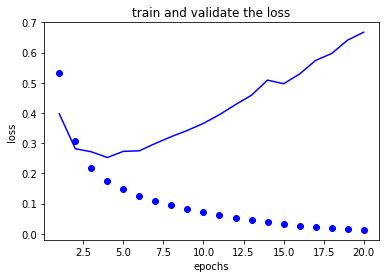

In [16]:
import matplotlib.pyplot as plt

loss_value = history_dict.get('loss')
val_loss_value = history_dict.get('val_loss')
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'bo', label='training loss')
plt.plot(epochs, val_loss_value, 'b', label='validate loss')
plt.title("train and validate the loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
